# Analysis of Trump tweets




## Dependencies

In [25]:
!pip install afinn

    100% |████████████████████████████████| 61kB 2.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


## Imports

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset


In [0]:
url = 'https://raw.githubusercontent.com/Dodicin/trump-tweet-analysis/master/data/dataset.json'
tweets = pd.read_json(url)

In [28]:
print(type(tweets))
print(len(tweets))

<class 'pandas.core.frame.DataFrame'>
4971


In [29]:
tweets.head(10)

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2019-04-25 18:11:16,83509,1121476784376225792,0.0,18576,Twitter for iPhone,Thank you! #MAGA🇺🇸 https://t.co/EWjwRlmIve
1,2019-04-25 18:09:25,72777,1121476321882902528,0.0,18406,Twitter for iPhone,Our Border Control Agents have done an incredi...
2,2019-04-25 17:17:56,0,1121463365501689856,1.0,8448,Twitter for iPhone,RT @WhiteHouse: President @realDonaldTrump and...
3,2019-04-25 16:32:44,59505,1121451990712762368,0.0,15057,Twitter for iPhone,Look forward to seeing everyone in Indianapoli...
4,2019-04-25 14:35:11,61435,1121422408420855808,0.0,15213,Twitter for iPhone,I will be interviewed by @seanhannity tonight ...
5,2019-04-25 14:03:37,0,1121414462920065024,1.0,22457,Twitter for iPhone,"RT @RepMattGaetz: ""The man who killed my son n..."
6,2019-04-25 14:01:57,0,1121414042441125888,1.0,27516,Twitter for iPhone,RT @GOPChairwoman: If Joe Biden wants to keep ...
7,2019-04-25 13:48:02,0,1121410542973984768,1.0,14090,Twitter for iPhone,RT @GOPChairwoman: Joe Biden literally can’t h...
8,2019-04-25 13:47:45,0,1121410469644972032,1.0,10458,Twitter for iPhone,RT @GOP: Do you want to go back to a bad econo...
9,2019-04-25 13:35:56,0,1121407497741447168,1.0,6605,Twitter for iPhone,RT @RepAndyBiggsAZ: I’m grateful for my collea...


## Tokenization


In [0]:
import re

contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [31]:
from nltk.tokenize import TweetTokenizer
tokening = TweetTokenizer(strip_handles=True, reduce_len=True)

tweets_text = tweets['text']
tweets_text = tweets_text.apply(lambda t:t.replace('’', "'"))
tweets_text = tweets_text.apply(lambda t:t.replace('“', '"'))
tweets_text = tweets_text.apply(lambda t:t.replace('”', '"'))
tweets_text = tweets_text.apply(lambda t:re.sub(r"\s*http[^\s]+", '', t))
tweets_text = tweets_text.apply(expand_contractions)
tweets_tokenized = tweets_text.apply(tokening.tokenize)
tweets_tokenized.head(6)

0                         [Thank, you, !, #MAGA, 🇺, 🇸]
1    [Our, Border, Control, Agents, have, done, an,...
2    [RT, :, President, and, traveled, to, Atlanta,...
3    [Look, forward, to, seeing, everyone, in, Indi...
4    [I, will, be, interviewed, by, tonight, at, 9:...
5    [RT, :, ", The, man, who, killed, my, son, nev...
Name: text, dtype: object

## Stopwords removal

In [32]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
#adding some of the stopwords after observing the tweets
stop.add("The")
stop.add("And")
stop.add("I")
stop.add("J")
stop.add("K")
stop.add("I'd")
stop.add("That's")
stop.add("\x81")
stop.add("It")
stop.add("I'm")
stop.add("...")
stop.add("\x89")
stop.add("ĚĄ")
stop.add("it's")
stop.add("ă")
stop.add("\x9d")
stop.add("âÂĺ")
stop.add("Ě")
stop.add("˘")
stop.add("Â")
stop.add("âÂ")
stop.add("Ň")
stop.add("http")
stop.add("https")
stop.add("co")
stop.add("000")
stop.add("Ň")
stop.add("Ň")
stop.add("Ň")
stop.add("RT")

stop = list(stop)
print(stop)

['hasn', 'was', 'be', 'such', 'when', 'co', 'is', 'do', "should've", 'before', 'me', 't', 'into', "wasn't", 'll', 'we', 'own', 'my', 'until', 'what', 'whom', "shouldn't", 'so', 'up', "That's", 'where', 'ă', 'theirs', 'while', "shan't", 'Ň', 'if', 'don', "you'll", 'ain', "you're", 'shan', 'in', 'too', "isn't", 'of', "won't", "needn't", "weren't", 'his', 'ma', 'And', 'just', 'I', 'but', 'against', 'further', 'through', 'been', 'being', 'she', 'doing', 'these', 'between', '\x81', 'd', 'ourselves', 'nor', "aren't", 'all', "that'll", 'wasn', 'below', 'off', 'here', 'its', 'it', 'did', 'yourself', "hadn't", 'her', 'during', 'under', 'once', 'they', 'can', "it's", 'any', 'him', 'himself', "haven't", 'didn', 'RT', 'over', 'myself', '˘', 'ĚĄ', 'their', 'after', 'those', 'above', "hasn't", 's', 'weren', 'how', "I'm", 'same', 'https', 'not', 'shouldn', 'now', 'an', 'haven', "you'd", 'had', 'he', 'yourselves', 'which', 'other', 'Ě', '000', 'themselves', 'y', 'for', 'a', 'out', '...', 'has', 'needn

In [33]:
tweets_tokenized_stop = tweets_tokenized.apply(lambda x: [item for item in x if item not in stop])
tweets_tokenized_stop

0                                 [Thank, !, #MAGA, 🇺, 🇸]
1       [Our, Border, Control, Agents, done, incredibl...
2       [:, President, traveled, Atlanta, ,, Georgia, ...
3       [Look, forward, seeing, everyone, Indianapolis...
4           [interviewed, tonight, 9:00, PM, ., Enjoy, !]
5       [:, ", man, killed, son, never, day, prison, ....
6       [:, If, Joe, Biden, wants, keep, score, :, In,...
7       [:, Joe, Biden, literally, cannot, hide, econo...
8       [:, Do, want, go, back, bad, economy, ,, faile...
9       [:, grateful, colleagues, accompanied, border,...
10      [:, Volume, 1, Mueller, Report, based, evidenc...
11      [:, We, knew, would, give, ., collusion, delus...
12      [:, ", collusion, delusion, fell, flat, ., ", ...
13      [:, Reminder, :, Democrats, demanding, unredac...
14      [:, It's, time, figure, Comey, Cabal, start, f...
15      [:, Democrats, obsessed, ., It's, time, move, ...
16      [:, Peter, Strzok, told, us, would, ", love, a...
17      [Welco

## Punctuation removal

In [34]:
import string
from nltk import wordpunct_tokenize

punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
tweets_tokenized_stop_punct = tweets_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])
tweets_tokenized_stop_punct

0                                    [Thank, #MAGA, 🇺, 🇸]
1       [Our, Border, Control, Agents, done, incredibl...
2       [President, traveled, Atlanta, Georgia, yester...
3       [Look, forward, seeing, everyone, Indianapolis...
4                 [interviewed, tonight, 9:00, PM, Enjoy]
5       [man, killed, son, never, day, prison, Not, on...
6       [If, Joe, Biden, wants, keep, score, In, 8, ye...
7       [Joe, Biden, literally, cannot, hide, economic...
8       [Do, want, go, back, bad, economy, failed, for...
9       [grateful, colleagues, accompanied, border, vi...
10      [Volume, 1, Mueller, Report, based, evidence, ...
11      [We, knew, would, give, collusion, delusion, f...
12      [collusion, delusion, fell, flat, suggests, De...
13      [Reminder, Democrats, demanding, unredacted, M...
14      [It's, time, figure, Comey, Cabal, start, fake...
15      [Democrats, obsessed, It's, time, move, solve,...
16      [Peter, Strzok, told, us, would, love, answer,...
17      [Welco

## Stemming

In [36]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

tweets_tokenized_new_stem = tweets_tokenized_stop_punct.apply(lambda x: [snowball_stemmer.stem(item) for item in x])
tweets['tokenized_text'] = tweets_tokenized_new_stem
tweets_tokenized_new_stem

0                                    [thank, #maga, 🇺, 🇸]
1       [our, border, control, agent, done, incred, jo...
2       [presid, travel, atlanta, georgia, yesterday, ...
3       [look, forward, see, everyon, indianapoli, ind...
4                   [interview, tonight, 9:00, pm, enjoy]
5       [man, kill, son, never, day, prison, not, one,...
6       [if, joe, biden, want, keep, score, in, 8, yea...
7       [joe, biden, liter, cannot, hide, econom, succ...
8       [do, want, go, back, bad, economi, fail, forei...
9       [grate, colleagu, accompani, border, view, cri...
10      [volum, 1, mueller, report, base, evid, volum,...
11      [we, knew, would, give, collus, delus, fell, f...
12      [collus, delus, fell, flat, suggest, democrat,...
13      [remind, democrat, demand, unredact, mueller, ...
14      [it, time, figur, comey, cabal, start, fake, r...
15      [democrat, obsess, it, time, move, solv, probl...
16      [peter, strzok, told, us, would, love, answer,...
17      [welco

## Visualization

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from PIL import Image
import numpy as np

from wordcloud import WordCloud

In [0]:
from collections import Counter
import itertools

sentences = (list(itertools.chain(tweets_tokenized_new_stem)))
flat_list = [item for sublist in sentences for item in sublist]
flat_list
c = Counter(flat_list)
c.most_common()

(-0.5, 399.5, 199.5, -0.5)

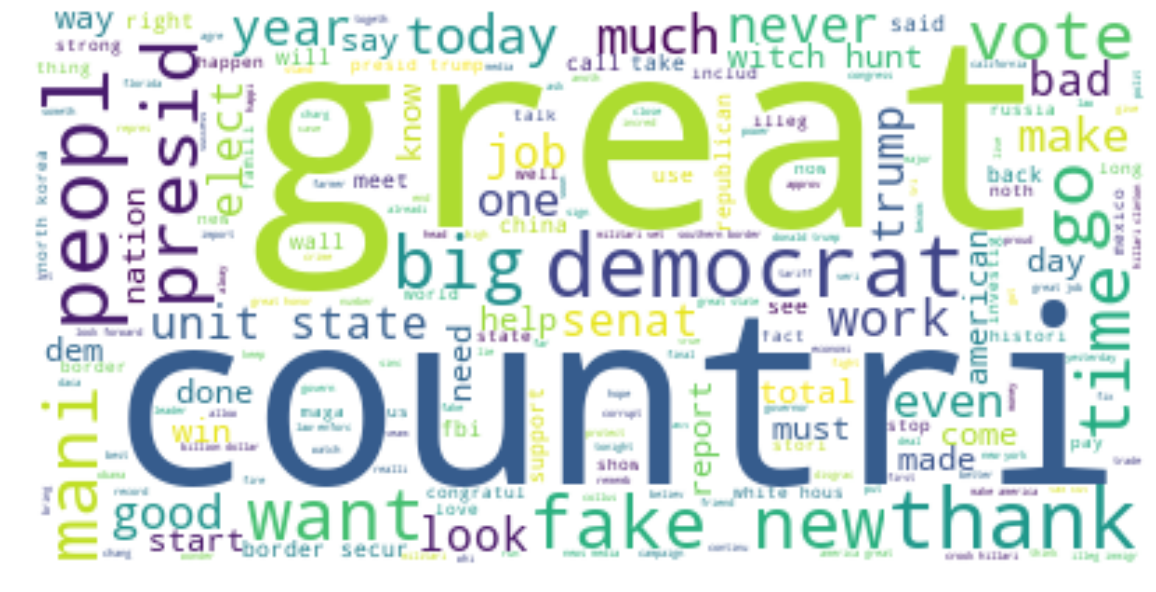

In [40]:
import itertools

sentences = (list(itertools.chain(tweets_tokenized_new_stem)))
flat_list = [item for sublist in sentences for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

## Sentiment

In [41]:
from afinn import Afinn
afinn = Afinn()

tweets['afinn'] = tweets["text"].apply(afinn.score)
tweets[['afinn', 'text', 'tokenized_text']].head(10)

,afinn,text,tokenized_text
0,2.0,Thank you! #MAGA🇺🇸 https://t.co/EWjwRlmIve,"[thank, #maga, 🇺, 🇸]"
1,13.0,Our Border Control Agents have done an incredi...,"[our, border, control, agent, done, incred, jo..."
2,-3.0,RT @WhiteHouse: President @realDonaldTrump and...,"[presid, travel, atlanta, georgia, yesterday, ..."
3,0.0,Look forward to seeing everyone in Indianapoli...,"[look, forward, see, everyon, indianapoli, ind..."
4,2.0,I will be interviewed by @seanhannity tonight ...,"[interview, tonight, 9:00, pm, enjoy]"
5,-4.0,"RT @RepMattGaetz: ""The man who killed my son n...","[man, kill, son, never, day, prison, not, one,..."
6,-3.0,RT @GOPChairwoman: If Joe Biden wants to keep ...,"[if, joe, biden, want, keep, score, in, 8, yea..."
7,-1.0,RT @GOPChairwoman: Joe Biden literally can’t h...,"[joe, biden, liter, cannot, hide, econom, succ..."
8,-4.0,RT @GOP: Do you want to go back to a bad econo...,"[do, want, go, back, bad, economi, fail, forei..."
9,0.0,RT @RepAndyBiggsAZ: I’m grateful for my collea...,"[grate, colleagu, accompani, border, view, cri..."


(-0.5, 399.5, 199.5, -0.5)

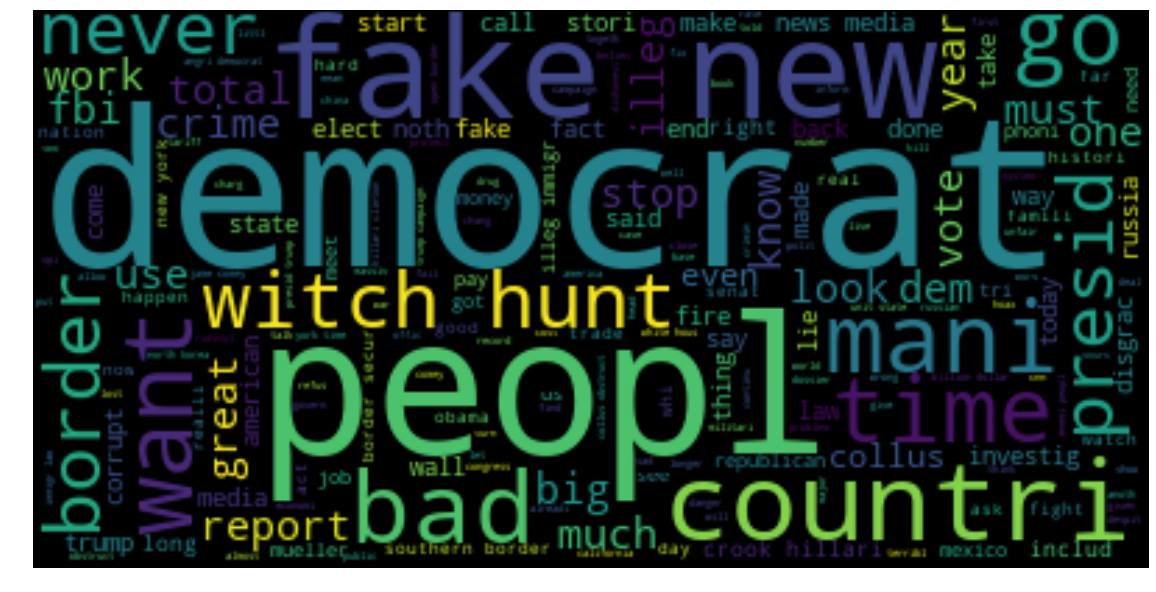

In [42]:
import itertools

is_negative =  tweets['afinn'] < 0
negative_tweets = tweets[is_negative]
negative_tweets[['afinn', 'text', 'tokenized_text']].head(10)
  
sentences = (list(itertools.chain(negative_tweets['tokenized_text'])))
flat_list = [item for sublist in sentences for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="black").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

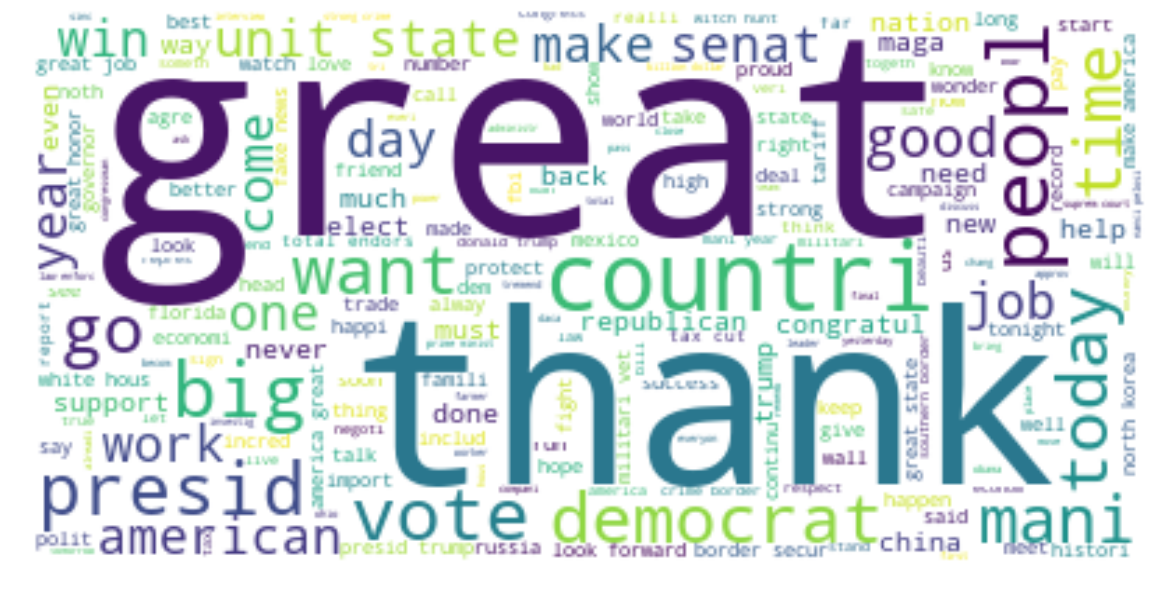

In [43]:
import itertools

is_negative =  tweets['afinn'] >= 0
negative_tweets = tweets[is_negative]
negative_tweets[['afinn', 'text', 'tokenized_text']].head(10)
  
sentences = (list(itertools.chain(negative_tweets['tokenized_text'])))
flat_list = [item for sublist in sentences for item in sublist]
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")

# Analysis

## Dependencies

In [44]:
!pip install arrow

## Imports

In [0]:
%matplotlib inline

import warnings
import requests
import zipfile
import io
import json
import unicodedata

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET

from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Utilities

In [0]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

## Preprocessing

In [47]:
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.text.fillna(tweets.text, inplace=True)
tweets['human_date'] = tweets['created_date'].apply(convertUTCtoFull)
tweets['month/day'] = tweets['created_date'].apply(convertUTCtoMonthDay)
tweets['year'] = tweets['created_date'].apply(convertUTCtoYear)
tweets['month'] = tweets['created_date'].apply(convertUTCtoMonth)
tweets['year_month'] = tweets['created_date'].apply(convertUTCtoYearMonth)
tweets['day'] = tweets['created_date'].apply(convertUTCtoDay)
tweets['day of week'] = tweets['created_date'].apply(convertUTCtoDayOfWeek)
tweets['hour'] = tweets['created_date'].apply(convertUTCtoHourOfDay)
tweets['week'] = tweets['created_date'].apply(convertUTCtoWeekNumber) 
tweets['year_week'] = tweets['created_date'].apply(convertUTCtoYearWeekNumber)
tweets['text encoded'] = tweets['text'].apply(encodeText)
tweets.set_index('created_date', inplace=True)

tweets['source'] = tweets['source'].apply(lambda x: 'Twitter Media Studio' if x == 'Media Studio' else x);


tweets.head()

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,tokenized_text,afinn,id,...,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded
created_date,,,,,,,,,,,,,,,,,,,,,
2019-04-25 18:11:16,2019-04-25 18:11:16,83509,1121476784376225792,0.0,18576,Twitter for iPhone,Thank you! #MAGA🇺🇸 https://t.co/EWjwRlmIve,"[thank, #maga, 🇺, 🇸]",2.0,1121476784376225792,...,2019-04-25,2019,04,2019-04,25,4,14,16,2019-16,b'Thank you! #MAGA https://t.co/EWjwRlmIve'
2019-04-25 18:09:25,2019-04-25 18:09:25,72777,1121476321882902528,0.0,18406,Twitter for iPhone,Our Border Control Agents have done an incredi...,"[our, border, control, agent, done, incred, jo...",13.0,1121476321882902528,...,2019-04-25,2019,04,2019-04,25,4,14,16,2019-16,b'Our Border Control Agents have done an incre...
2019-04-25 17:17:56,2019-04-25 17:17:56,0,1121463365501689856,1.0,8448,Twitter for iPhone,RT @WhiteHouse: President @realDonaldTrump and...,"[presid, travel, atlanta, georgia, yesterday, ...",-3.0,1121463365501689856,...,2019-04-25,2019,04,2019-04,25,4,13,16,2019-16,b'RT @WhiteHouse: President @realDonaldTrump a...
2019-04-25 16:32:44,2019-04-25 16:32:44,59505,1121451990712762368,0.0,15057,Twitter for iPhone,Look forward to seeing everyone in Indianapoli...,"[look, forward, see, everyon, indianapoli, ind...",0.0,1121451990712762368,...,2019-04-25,2019,04,2019-04,25,4,12,16,2019-16,b'Look forward to seeing everyone in Indianapo...
2019-04-25 14:35:11,2019-04-25 14:35:11,61435,1121422408420855808,0.0,15213,Twitter for iPhone,I will be interviewed by @seanhannity tonight ...,"[interview, tonight, 9:00, pm, enjoy]",2.0,1121422408420855808,...,2019-04-25,2019,04,2019-04,25,4,10,16,2019-16,b'I will be interviewed by @seanhannity tonigh...


## Frequencies

### Tweets by source

In [48]:
tweetsPerSource = tweets[['source', 'text']].groupby(['source']).agg(['count'])
print(tweetsPerSource)

                      text
                     count
source                    
Twitter Media Studio    78
Twitter Web Client       7
Twitter for iPad        18
Twitter for iPhone    4868


### Tweets per hour

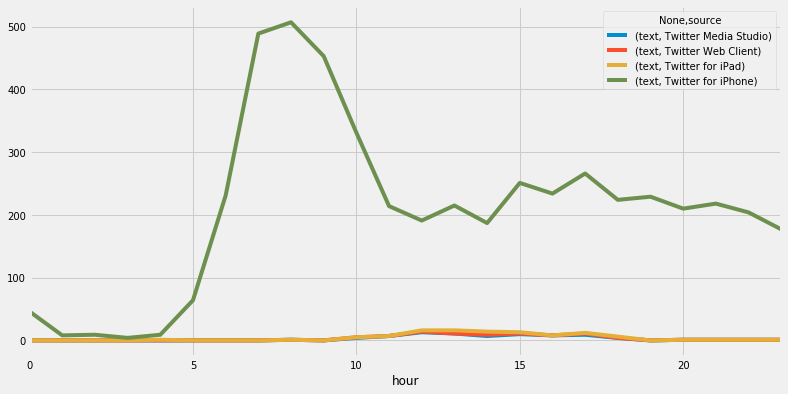

In [49]:
tweetsPerHour = tweets[['source', 'hour', 'text']].pivot_table(
    index='hour', columns=['source'], aggfunc='count')
tweetsPerHour.iloc[::-1].plot(kind='line', stacked=True)

### Tweets per day of week

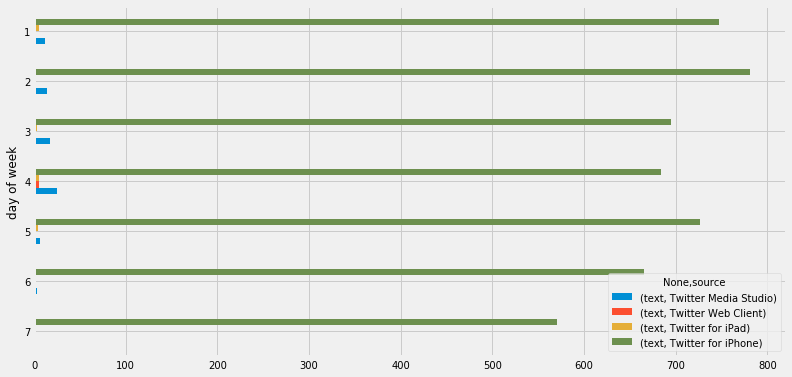

In [50]:
tweetsPerDayOfWeek = tweets[['source', 'day of week', 'text']].pivot_table(
    index='day of week', columns=['source'], aggfunc='count')
tweetsPerDayOfWeek.iloc[::-1].plot(kind='barh')

### Tweets per hour from Media Studio

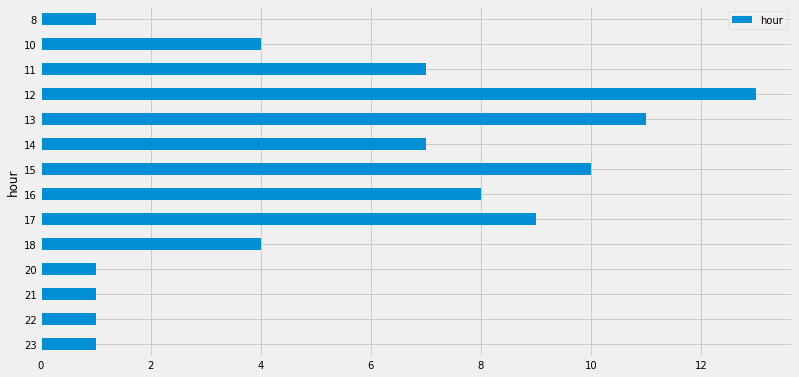

In [51]:
is_media_studio =  tweets['source'] == 'Twitter Media Studio'
tweetsMediaStudio = tweets[is_media_studio]

tweetsPerHourMediaStudio = tweetsMediaStudio[['hour']].groupby(tweetsMediaStudio['hour']).count()
tweetsPerHourMediaStudio.iloc[::-1].plot(kind='barh')

### Tweets per hour from iPhone

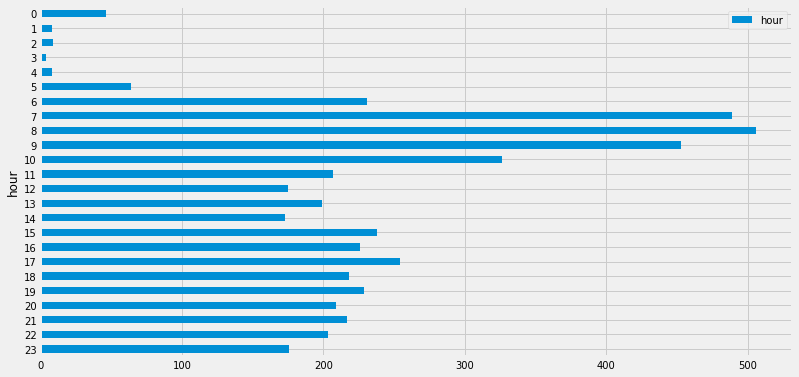

In [52]:
is_iphone =  tweets['source'] == 'Twitter for iPhone'
tweetsPerHourIPhone = tweets[is_iphone]

tweetsPerHourIPhone = tweetsPerHourIPhone[['hour']].groupby(tweetsPerHourIPhone['hour']).count()
tweetsPerHourIPhone.iloc[::-1].plot(kind='barh')

# Mueller report

In [0]:
from IPython.display import display, Markdown

tweetsEnc = tweets.reset_index()

def analyzeText(search):
    print('Search: {0}'.format(search))
    filtered = tweetsEnc[tweetsEnc['text'].str.contains(search, case=False)]
    count = len(filtered)
    percent = float(len(filtered))/len(tweetsEnc) * 100
    print('Number of Tweets: {0}'.format(count))
    print('Percent of all Tweets: {0:.2f}%'.format(percent))
    
    # set up the base data frame for indexing purposes
    baseWeek = tweets[['source', 'year', 'week', 'text']].pivot_table(index=['year', 'week'], columns=['source'], aggfunc='count')
    baseMonth = tweets[['source', 'year', 'month', 'text']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')

    # set up the filtered data frame
    analyzedByWeek = filtered[['source', 'year', 'week', 'text']].pivot_table(index=['year', 'week'], columns=['source'], aggfunc='count')
    analyzedByMonth = filtered[['source', 'year', 'month', 'text']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')
    analyzedByHour = filtered[['source', 'hour', 'text']].pivot_table(index=['hour'], columns=['source'], aggfunc='count')

    # adjust the filtered data frame to use the index from the base data frame
    analyzedByWeek = analyzedByWeek.reindex_like(baseWeek)
    analyzedByMonth = analyzedByMonth.reindex_like(baseMonth)
    analyzedByHour = analyzedByHour.reindex(range(0, 24)).fillna(0)

    # spit out the plot
    analyzedByWeekPlot = analyzedByWeek.plot(kind='bar', stacked=True, title='{0} by week'.format(search)) 
    plt.show()

    analyzedByMonthPlot = analyzedByMonth.plot(kind='bar', stacked=True, title='{0} by month'.format(search))
    plt.show()

    analyzedByHourPlot = analyzedByHour.plot(kind='bar', stacked=True, title='{0} by hour of day'.format(search))
    plt.show()

Search: Mueller
Number of Tweets: 134
Percent of all Tweets: 2.70%


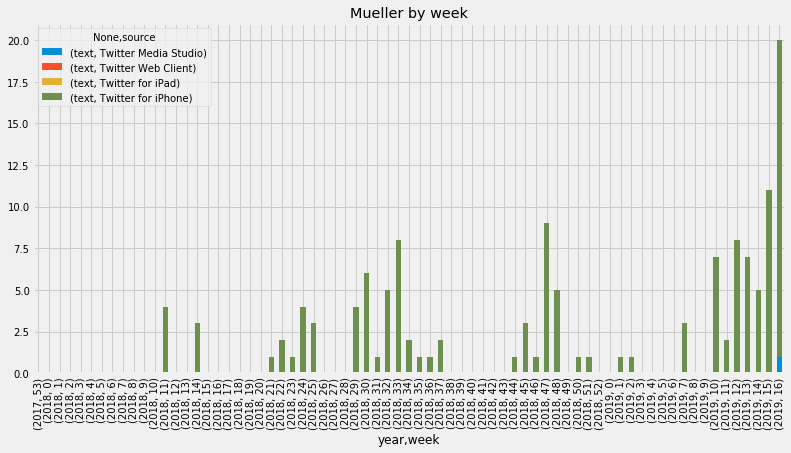

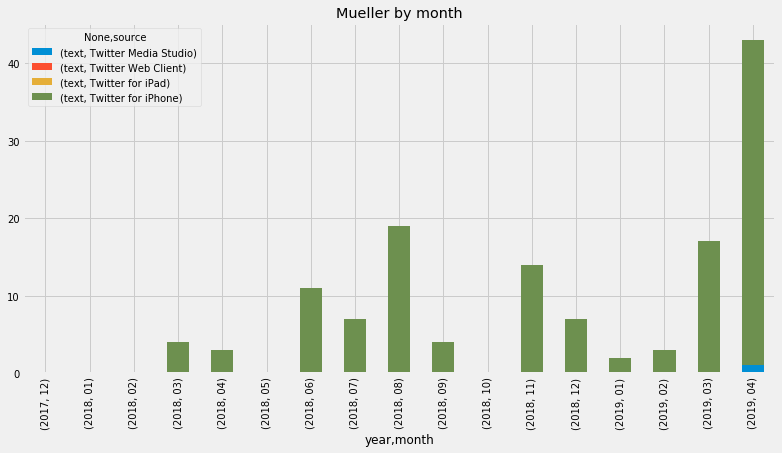

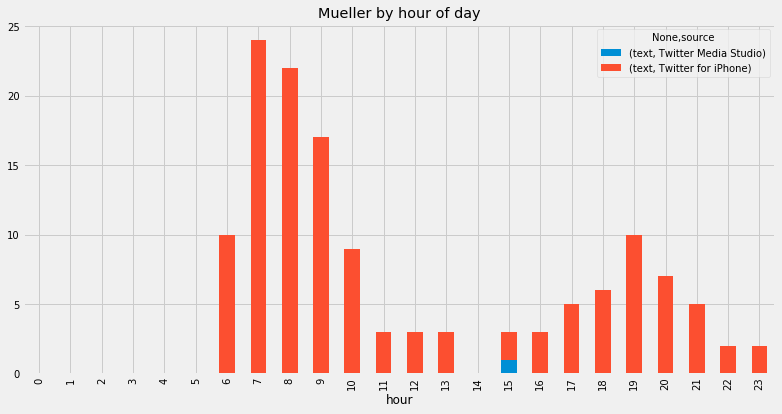

Search: Collusion
Number of Tweets: 203
Percent of all Tweets: 4.08%


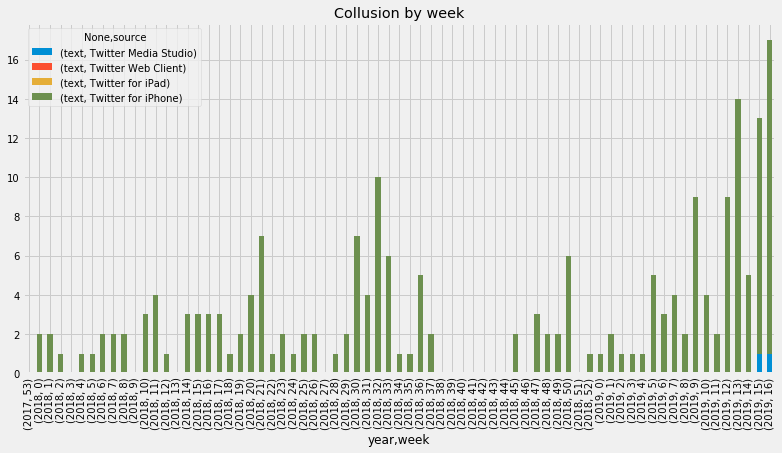

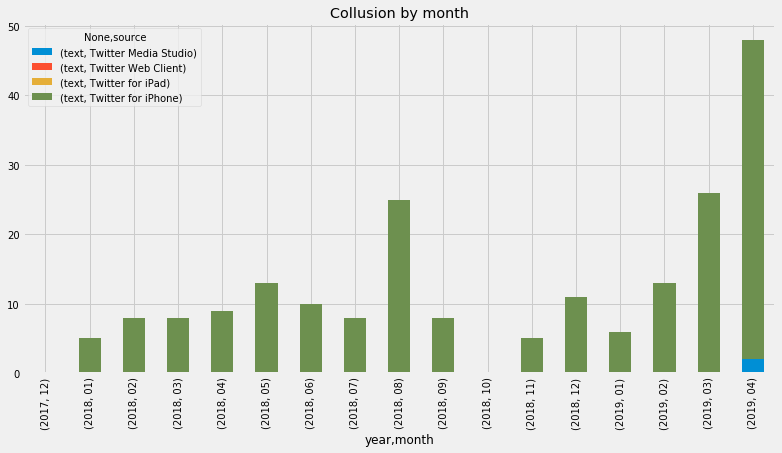

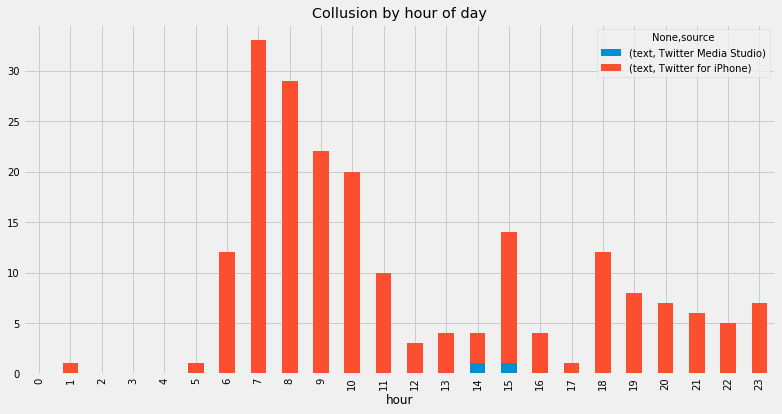

In [106]:
searches = ['Mueller', "Collusion"]
for search in searches:
  analyzeText(search)

## Mood Analysis (NRC lexicon)

### Import lexicon

In [0]:
url = 'https://raw.githubusercontent.com/Dodicin/trump-tweet-analysis/master/data/NRC-AffectIntensity-Lexicon.txt'
lexicon = pd.read_csv(url, sep='\t')

### Mood Analysis on whole dataset
Stemming the lexicon to match with the stemmed words

In [92]:
words_list = pd.DataFrame(list(flat_list), columns = ["term"])

print(len(lexicon))
print(len(words_list))

5814
53364


In [96]:
lexicon.head(6)
words_list.head(6)

,term
0,thank
1,#maga
2,🇺
3,🇸
4,our
5,border


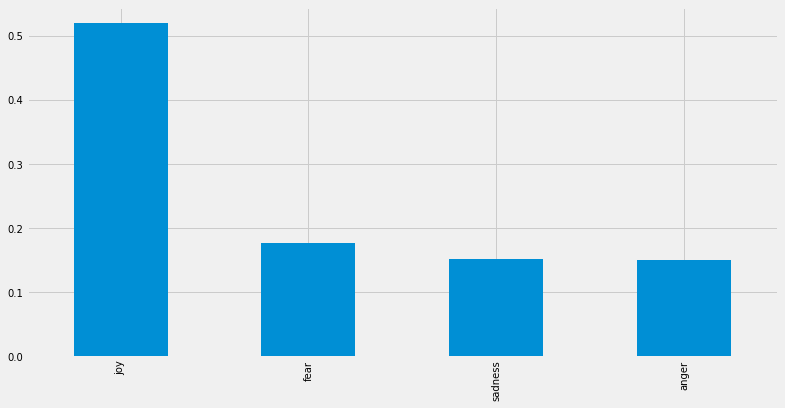

In [155]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

lexicon["term"] = lexicon["term"].apply(lambda x: snowball_stemmer.stem(x))
lexicon.sort_values("term", inplace=True) 
lexicon.drop_duplicates(subset="term")

join = pd.merge(words_list, lexicon, how='left', on=['term'])
join.dropna(inplace=True)

join["AffectDimension"].value_counts(normalize=True).plot(kind='bar',x='emotion',y='count')



### Mood analysis on Mueller tweets

In [0]:
#sentences = (list(itertools.chain(tweets_tokenized_new_stem)))
#flat_list = [item for sublist in sentences for item in sublist]
#flat_list
import itertools

tweets_filtered_m = tweets_tokenized_new_stem.apply(lambda x: "mueller" in x)
tweets_filtered_m = tweets_tokenized_new_stem[tweets_filtered_m]

tweets_filtered_c = tweets_tokenized_new_stem.apply(lambda x: snowball_stemmer.stem("collusion") in x)
tweets_filtered_c = tweets_tokenized_new_stem[tweets_filtered_c]

sentences_mueller = (list(itertools.chain(tweets_filtered_m)))
flat_list_mueller = [item for sublist in sentences_mueller for item in sublist]

sentences_collusion = (list(itertools.chain(tweets_filtered_c)))
flat_list_collusion = [item for sublist in sentences_collusion for item in sublist]

words_list_mueller = pd.DataFrame(list(flat_list_mueller), columns = ["term"])
words_list_collusion = pd.DataFrame(list(flat_list_collusion), columns = ["term"])

join_mueller = pd.merge(words_list_mueller, lexicon, how='left', on=['term'])
join_mueller.dropna(inplace=True)

join_collusion = pd.merge(words_list_collusion, lexicon, how='left', on=['term'])
join_collusion.dropna(inplace=True)


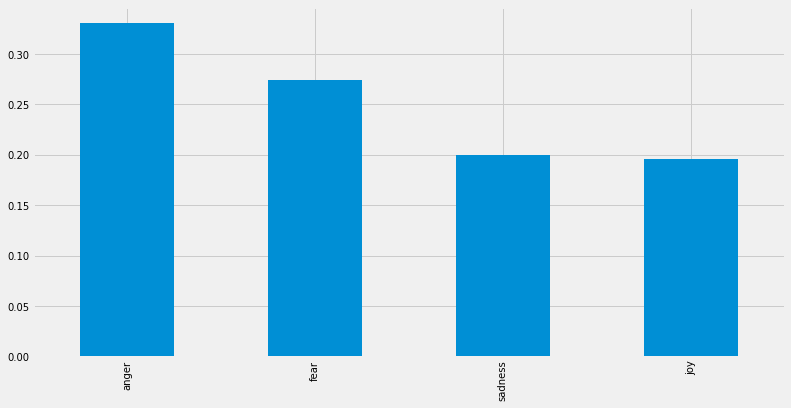

In [156]:
join_mueller["AffectDimension"].value_counts(normalize=True).plot(kind='bar',x='emotion',y='count')


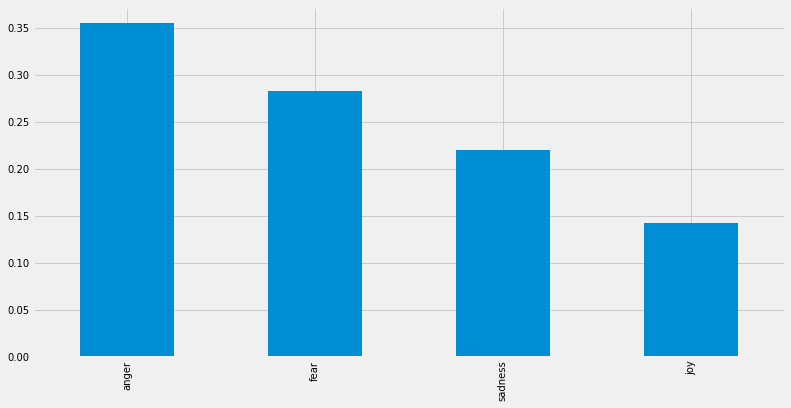

In [157]:
join_collusion["AffectDimension"].value_counts(normalize=True).plot(kind='bar',x='emotion',y='count')
